- unfreeze all bn 1 epoch then freeze
- diff lr per layer
- TTA
- 2x2 avg pool?

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

from sklearn.metrics import fbeta_score

In [2]:
def f2(preds, targs):
    return max([fbeta_score(targs, (preds>th), 2, average='samples') 
                for th in [0.17,0.18,0.19,0.20,0.21,0.22,0.23]])

In [3]:
bs=48; sz=64; metrics=[f2]
f_model = resnet34
path = "/data/jhoward/fast/planet/"

## Train

In [4]:
n=len(list(open(f'{path}train_v2.csv')))-1
val_pct=0.2
np.random.seed(42)
val_idxs=np.random.permutation(n)[:int(val_pct*n)]

In [5]:
transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]

In [9]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

In [10]:
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [11]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [9]:
lrf=learn.lr_find(True)

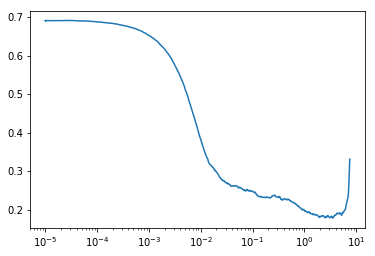

In [10]:
lrf.plot()

In [12]:
learn.fit(2, 0.6, cycle_len=1)

[0.16731255582266488, 0.15604158, 0.85079503]


[0.14607769340769866, 0.13391034, 0.88217425]



In [13]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(2, 0.15*(i-3), cycle_len=1)

[0.11211051306809902, 0.10723209, 0.91115791]


[0.11147630933099585, 0.10234582, 0.91419721]



[0.10741887840532442, 0.10113827, 0.91540474]


[0.10200100254914754, 0.098316282, 0.91860402]



[0.1051084504232765, 0.09684553, 0.92043144]


[0.1026681252530293, 0.097253472, 0.92001504]



In [14]:
learn.unfreeze()

In [15]:
learn.fit(1, 0.2, cycle_len=1)

[0.1019029351428534, 0.097743586, 0.91935575]



In [16]:
learn.fit(1, 1e-2, cycle_len=1)

[0.10554980265353142, 0.096712127, 0.9204393]



In [17]:
learn.fit(20, 0.2, cycle_len=5)

[0.11114272923072979, 0.1069662, 0.91169989]


[0.11317233411166937, 0.10300231, 0.9125343]


[0.10354501070432769, 0.096518397, 0.91947818]


[0.09617684963162138, 0.09403716, 0.9225511]


[0.09295991032036807, 0.093188263, 0.9231934]


[0.10587451012458066, 0.10245983, 0.91254783]


[0.10365833646337498, 0.10225147, 0.91356051]


[0.09552804584818166, 0.095828213, 0.92088175]


[0.09771522029955818, 0.092932999, 0.92339128]


[0.09022603874491554, 0.092357352, 0.92409754]


[0.10481386507344555, 0.099374026, 0.91832149]


[0.10176477734938753, 0.097013406, 0.92092758]


[0.09438300669102279, 0.095287293, 0.92254484]


[0.09034562613434192, 0.092482775, 0.92377073]


[0.08850341026183745, 0.091876931, 0.92397141]


[0.09691115951831274, 0.10087989, 0.91557431]


[0.1001146570917652, 0.096235409, 0.92042607]


[0.09342032040534592, 0.092630155, 0.92367768]


[0.09753600558474583, 0.091638304, 0.92441165]


[0.09078817098586363, 0.091594703, 0.92401981]



In [18]:
learn.save('rn34-64')

In [19]:
tfms = ClassifierData.tfms_from_model(f_model, 128, aug_tfms=transforms_top_down, max_zoom=1.05)

In [20]:
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [21]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [22]:
learn.load('rn34-64')

In [23]:
learn.fit(2, 0.6, cycle_len=1)

[0.09040665491905707, 0.089603208, 0.92502129]


[0.09238765170556798, 0.088370115, 0.92617887]



In [24]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.15*(i-3), cycle_len=1)

[0.08847040806744126, 0.086211495, 0.92816639]



[0.0865929412508701, 0.08462026, 0.93014055]



[0.08502236927077081, 0.08423207, 0.93102765]



In [25]:
learn.unfreeze()

In [26]:
learn.fit(1, 0.2, cycle_len=1)

[0.08947825587788487, 0.084578767, 0.93074]



In [27]:
learn.fit(12, 0.2, cycle_len=3)

[0.08737609770386325, 0.088555098, 0.92723542]


[0.0835643600413837, 0.084279984, 0.92959845]


[0.08865473238857562, 0.083243161, 0.93151921]


[0.08771002541479252, 0.090233676, 0.92608541]


[0.08520111707348424, 0.084416777, 0.93134314]


[0.0856056302672701, 0.083224818, 0.93102765]


[0.08833470782703243, 0.088937044, 0.92697775]


[0.08130561729601089, 0.084956326, 0.93021578]


[0.08007584836192994, 0.082804598, 0.93119442]


[0.08834970651434895, 0.089639358, 0.92372382]


[0.07985271353883706, 0.084389225, 0.92961508]


[0.08229098312785947, 0.083043084, 0.931615]



In [28]:
learn.save('rn34-128')

In [29]:
tfms = ClassifierData.tfms_from_model(f_model, 244, aug_tfms=transforms_top_down, max_zoom=1.05)
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [30]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [31]:
learn.load('rn34-128')

In [32]:
learn.fit(2, 0.6, cycle_len=1)

[0.09352256548777489, 0.088524252, 0.92656159]


[0.0903610340628843, 0.087648898, 0.92744511]



In [33]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.15*(i-3), cycle_len=1)

[0.09193766875641474, 0.08381626, 0.93138391]



[0.08586262487762453, 0.082859673, 0.93125981]



[0.08601815795571181, 0.082361482, 0.93221253]



In [34]:
learn.unfreeze()

In [35]:
learn.fit(1, 0.2, cycle_len=1)

[0.08091751801212284, 0.081979662, 0.9333815]



In [36]:
learn.fit(6, 0.2, cycle_len=3)

[0.08480015301354527, 0.087835863, 0.92833859]


[0.08828970231178329, 0.083097145, 0.93206668]


[0.08767882430967691, 0.081585154, 0.93278384]


[0.09059980696597145, 0.08574301, 0.92862606]


[0.08519632723660447, 0.082384408, 0.93232739]


[0.07479882211351867, 0.081562832, 0.93381053]



In [37]:
learn.fit(8, 0.2, cycle_len=4)

[0.09053232970323463, 0.090985663, 0.92505252]


[0.08004779084567668, 0.083444975, 0.93154836]


[0.08080160368091756, 0.082496487, 0.93275201]


[0.07774200405430315, 0.081475131, 0.93277138]


[0.08976763757513938, 0.089661807, 0.92788148]


[0.08510234534400485, 0.085240722, 0.92912066]


[0.07717728926712512, 0.081183419, 0.93344647]


[0.07456302243358491, 0.080938138, 0.9333449]



In [38]:
learn.save('rn34-244')

### Import data

In [15]:
tfm=image_gen(noop, 64, pad=6)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (tfm,tfm),
               suffix='.jpg')

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

In [ ]:
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

In [ ]:
PIL.Image.open(ds.val_dl.dataset.fnames[0])